In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import numpy as np

In [3]:
skus = pd.read_csv("catalogo_prod_sku_nombre.csv")

In [4]:
data = pd.read_csv("productos_escaneados.csv")
data

,N_ID_PE,N_ID_PARTICIPANTE,N_ID_ACTIVIDAD,X_CODIGO_TRX,X_CODIGO_BARRAS_PROD,D_REG
0,1,118,4,2BF6951A-9743-4CDC-BB60-96D13C9AFC4D,7501055900800,2018-07-27 16:21:19
1,2,118,4,1C6355B5-109B-4C49-A784-CA58066E7FAC,7501055900800,2018-07-27 16:21:39
2,3,118,4,0F2A6DA1-3126-4438-87D1-AD23992DBB36,7501055900800,2018-07-27 16:21:58
3,4,121,2,42771F35-8275-4051-95F8-ACF8CCE687A1,7501055900039,2018-07-27 16:25:58
4,5,121,2,5A18A1AD-4D7B-4285-8013-865B7B685D61,7501055900039,2018-07-27 16:26:17
...,...,...,...,...,...,...
79432,79507,4531,16,D84C92FA-F4A8-4395-9195-677308F8EF53,7501013122039,2019-11-23 21:06:20
79433,79508,9486,16,77E92C7C-85E6-44B3-B52A-20E12F5B800D,7501055333837,2019-11-23 21:17:33
79434,79509,1718,16,2624F8AF-5CA2-425C-8BE5-CECD6BE8A2D6,7501020515343,2019-11-23 21:35:48
79435,79510,9625,13,EDF756AF-D286-444E-8761-5E1D73788C46,AKAWYHR8JM74MPS9,2019-11-23 22:25:12


C:\Users\gerar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


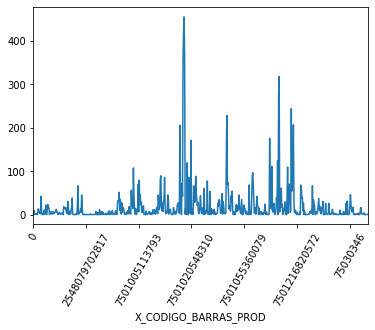

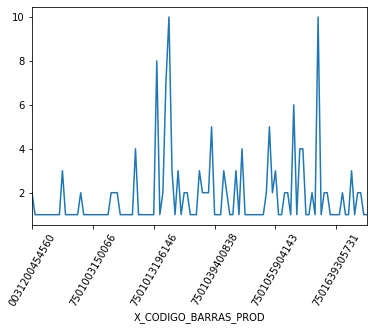

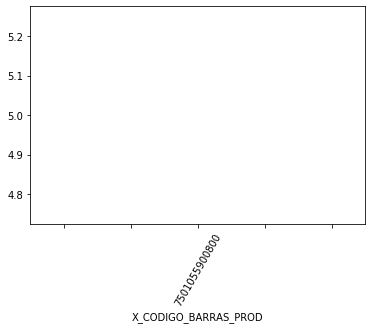

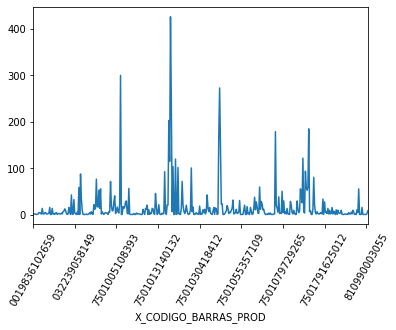

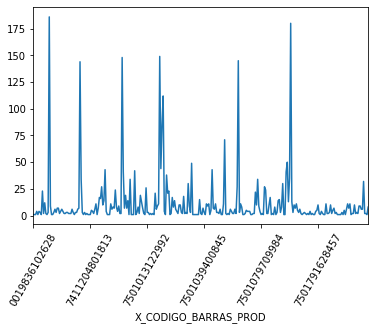

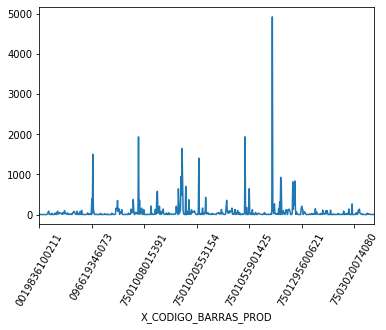

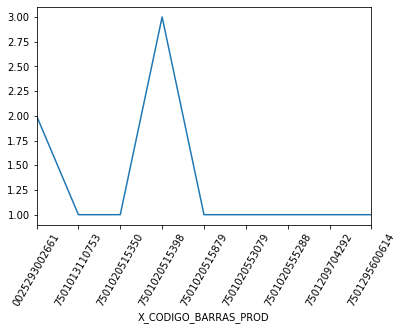

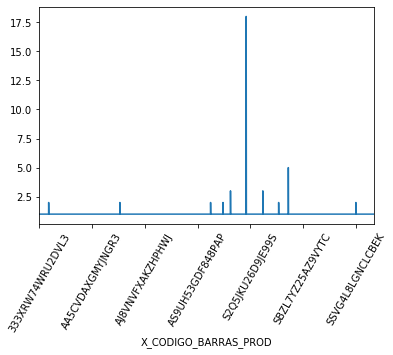

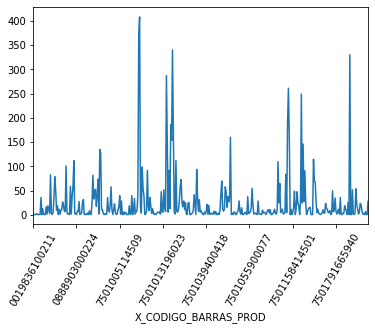

<Figure size 432x288 with 0 Axes>

In [6]:
%matplotlib inline
data_prod=data[["N_ID_ACTIVIDAD","X_CODIGO_BARRAS_PROD"]]
actividades=data_prod.groupby('N_ID_ACTIVIDAD')
#grafica escaneos por producto por actividad
for actividad, data_as in actividades:
    codigos=data_as.groupby('X_CODIGO_BARRAS_PROD')
    codigos.size().plot()
    plt.xticks(rotation=60)
#for i in range(len(x)):
    plt.figure()
 #   plt.plot(x[i],y[i])


In [ ]:
for actividad, data_as in actividades:
    codigos=data_as.groupby('X_CODIGO_BARRAS_PROD')
    codigos.size().plot()
    plt.xticks(rotation=60)
    count= codigos.count()
    cinco_mas=count.nlargest(5, ['N_ID_PARTICIPANTE']) 
    cinco_mas
    cinco_mas_r=cinco_mas.reset_index()
    cinco_mas_r
    cinco_mas_r["X_CODIGO_TRX"].plot()
    plt.xticks(rotation=60)
    break

In [ ]:
cinco_mas.index.get_level_values(0)
cinco_mas.index.tolist()
x=pd.Series(cinco_mas.index.tolist())
x
skus_mas=skus.loc[skus['N_BAR_CODE'].isin(x)]

In [ ]:
skus_drop=skus_mas.drop_duplicates(subset ="N_BAR_CODE") 
skus_drop

In [ ]:
df_cinco=cinco_mas_r[["X_CODIGO_BARRAS_PROD","N_ID_PE"]]
df_cinco["X_CODIGO_BARRAS_PROD"] = pd.to_numeric(df_cinco["X_CODIGO_BARRAS_PROD"])
df_cinco_srt=df_cinco.sort_values(by='X_CODIGO_BARRAS_PROD', ascending=True)
df_cinco_srt

In [ ]:
skus_drop["N_BAR_CODE"] = pd.to_numeric(skus_drop["N_BAR_CODE"])
skus_srt=skus_drop.sort_values(by='N_BAR_CODE', ascending=True)
skus_srt

In [ ]:
df = pd.concat([df_cinco_srt.reset_index() 
  ,skus_srt.reset_index() 
  ],axis=1)
df

In [ ]:
df=df.sort_values("N_ID_PE",ascending=False)
df

In [ ]:
df.columns = ["index","X_CODIGO_BARRAS","#_ESCANEOS","index","X_DESIGN_NAME","X_MAT_DESC","N_BAR_CODE"]
df

In [ ]:
df[["#_ESCANEOS","X_MAT_DESC","X_DESIGN_NAME","X_CODIGO_BARRAS"]]